## **Mount google drive connection to colab.**

In [ ]:
# import
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# cd
%cd ~
%cd ..

Mounted at /content/drive
/root
/


# **File Path**

In [ ]:
import os,glob

# check current directory to see if you're at the top
print(os.path.abspath(os.curdir))

# file path to save your zip file dataset
source_folder = r'content/drive/My Drive/SIC_LungXray_Classification/'

# variable for your filename
file = glob.glob(source_folder+'xray.zip',recursive=True)[0]
file

/


'content/drive/My Drive/SIC_LungXray_Classification/xray.zip'

# **Giải nén**

In [ ]:
# variable for the path
zip_path = file

# copies the zip file
!cp "{zip_path}" .

# unzip file virtually in colab
!unzip -q xray.zip

# removes copied zip
!rm xray.zip

In [ ]:
# check directory to see virtual files are in your main folder
import os,glob
print(os.path.abspath(os.curdir))
os.listdir()

/


['run',
 'lib64',
 'root',
 'etc',
 'bin',
 'dev',
 'var',
 'tmp',
 'lib32',
 'media',
 'opt',
 'srv',
 'boot',
 'sys',
 'usr',
 'libx32',
 'proc',
 'lib',
 'home',
 'mnt',
 'sbin',
 'chest_xray',
 'kaggle',
 'content',
 '.dockerenv',
 'datalab',
 'tools',
 'python-apt',
 'python-apt.tar.xz',
 'NGC-DL-CONTAINER-LICENSE',
 'cuda-keyring_1.1-1_all.deb']

# 1. Load data/ Tiền xử lý

In [ ]:

import pandas as pd
import numpy as np
np.random.seed(111)

Định nghĩa cấu trúc thư mục để sử dụng

In [ ]:
#  Set up directory paths from gdrive
train_dir_normal = 'chest_xray/train/NORMAL'
train_dir_pneum = 'chest_xray/train/PNEUMONIA'
test_dir_normal = 'chest_xray/test/NORMAL'
test_dir_pneum = 'chest_xray/test/PNEUMONIA'
val_dir_normal = 'chest_xray/val/NORMAL'
val_dir_pneum = 'chest_xray/val/PNEUMONIA'
all_dir_paths = [train_dir_normal, train_dir_pneum, test_dir_normal,
                 test_dir_pneum, val_dir_normal, val_dir_pneum]

In [ ]:
# use loop to get number of samples from all folders
for dataset in all_dir_paths:
  print(f'There are {len(os.listdir(dataset))} images in {str(dataset)} folder.')

There are 1341 images in chest_xray/train/NORMAL folder.
There are 3875 images in chest_xray/train/PNEUMONIA folder.
There are 234 images in chest_xray/test/NORMAL folder.
There are 390 images in chest_xray/test/PNEUMONIA folder.
There are 8 images in chest_xray/val/NORMAL folder.
There are 8 images in chest_xray/val/PNEUMONIA folder.


In [ ]:
import glob,os

In [ ]:
# use glob to get filenames of all images in each folder
train_files_normal = glob.glob(train_dir_normal+'/*.jpeg')
train_files_pneum = glob.glob(train_dir_pneum+'/*.jpeg')
all_train_files = [*train_files_normal,*train_files_pneum]

test_files_normal = glob.glob(test_dir_normal+'/*.jpeg')
test_files_pneum = glob.glob(test_dir_pneum+'/*.jpeg')
all_test_files = [*test_files_normal,*test_files_pneum]

val_files_normal = glob.glob(val_dir_normal+'/*.jpeg')
val_files_pneum = glob.glob(train_dir_pneum+'/*.jpeg')
all_val_files = [*val_files_normal,*val_files_pneum]

Tiền xử lý ảnh đã được load

In [ ]:
from PIL import Image
from keras.preprocessing import image
from imageio import imread
from skimage.transform import resize
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

def read_img(img_path,target_size=(224, 224)):
  """This function reads in the image using the image path filenames created by glob.
  Then it turns the image into an arrary for use with modeling. Specify target pixel
  size using target_size=(n,n). Default is 224,224 pixels."""

  img = image.load_img(img_path, target_size=target_size)
  img = image.img_to_array(img)

  return img

def load_train_test_val_images(training_filenames_normal, training_filenames_pneum,
                        test_filenames_normal, test_filenames_pneum,
                        # val_filenames_normal, val_filenames_pneum,
                        img_size=(224,224)):
    """Reads in training, test and val filenames, uses read_img() to change to
    change img to numpy array, then produces X and y data splits, in addition to
    creating proper binary labels for modeling. The validation set is intended
    to be used after training and testing model.

    ylabels are encoded as 0=normal, 1=pneumonia
    Returns:  X_train, X_test, X_val, y_train, y_test, y_val"""

    display('[i] LOADING IMAGES')


 # create empty lists to contain the image filenames and another to contain
 # the classification ylabel for each image.
    train_img = []
    train_label = []

# reads in and classifies training normal label
    for img_path in tqdm(training_filenames_normal):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(0)

# reads in and classifies training penumonia label
    for img_path in tqdm(training_filenames_pneum):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(1)


 # create empty lists to contain the image filenames and another to contain
 # the classification ylabel for each image.
    test_img = []
    test_label = []

# reads in and classifies test normal label
    for img_path in tqdm(test_filenames_normal):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(0)

# reads in and classifies test penumonia label
    for img_path in tqdm(test_filenames_pneum):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(1)


    # val_img = []
    # val_label = []

    # for img_path in tqdm(val_filenames_normal):
    #     val_img.append(read_img(img_path,target_size=img_size))
    #     val_label.append(0)

    # for img_path in tqdm(val_filenames_pneum):
    #     train_img.append(read_img(img_path,target_size=img_size))
    #     train_label.append(1)


# create your X_train and y_train variables for use in modeling
    X_train = np.array(train_img, np.float32)
    y_train = np.array(train_label)

    X_test = np.array(test_img, np.float32)
    y_test = np.array(test_label)

    # X_val = np.array(val_img, np.float32)
    # y_val = np.array(val_label)

# Prints the length of each split for use in batching and knowledge of data.
    print('\n[i] Length of Splits:')
    # print(f"X_train={len(X_train)}, X_test={len(X_test)}, X_val={len(X_val)}")
    print(f"X_train={len(X_train)}, X_test={len(X_test)}")

    # return X_train, X_test, X_val, y_train, y_test,y_val
    return X_train, X_test, y_train, y_test


# def train_test_val_datagens(X_train,X_test,X_val,y_train,y_test,y_val,
def train_test_val_datagens(X_train, X_test, y_train, y_test,
                            BATCH_SIZE = 32):

    """Takes in your training and test data and creates ImageDataGenerators
    for train,test,val data. This will normalize your image array data.
    Returns: training_set,test_set,val_set"""

    ## Create training and test data image generators.
    # This will normalize the image pixel data.
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                        zoom_range = 0.2)

    test_datagen = ImageDataGenerator(rescale = 1./255)

    # val_datagen = ImageDataGenerator(rescale = 1./255)

    training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
    test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
    # val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

    return training_set, test_set, # val_set


# final eval of model showing report, confusion matrix and acc/loss graphs
def evaluate_model(y_test, y_pred, model_history):
    """Takes in your target, target predictions, model history.
        Returns a metric report, confusion matrix and plots for
        accuracy and loss."""

    ## Classification Report / Scores
    print(metrics.classification_report(y_test,y_pred))

    # subplot for confusion matrix
    fig, ax = plt.subplots(figsize=(12,6))
    cm = metrics.confusion_matrix(y_test, y_pred, normalize='true')

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix. 0=Norm, 1=Pneum')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    classes = list(range(len(cm)))
    plt.xticks(classes, classes)
    plt.yticks(classes, classes)

    plt.show()


    # loss and acc plots
    fig, ax = plt.subplots(figsize=(12,6),ncols=2)

    train_acc = model_history.history['acc']
    test_acc = model_history.history['val_acc']
    train_loss = model_history.history['loss']
    test_loss = model_history.history['val_loss']

    epochs = range(len(train_acc))
    ax[0].plot(epochs, train_acc, 'g', label='Training acc')
    ax[0].plot(epochs, test_acc, 'b', label='Test acc')
    ax[0].legend()

    ax[1].plot(epochs, train_loss, 'g', label='Training loss')
    ax[1].plot(epochs, test_loss, 'b', label='Test loss')
    ax[1].legend()

    ax[0].set(title='Training and Testing accuracy')
    ax[1].set(title='Training and Testing loss')

    plt.tight_layout()
    plt.show()

In [ ]:
## USING FUNCTIONS TO LOAD IN IMAGES
# X_train,X_test,X_val,y_train,y_test,y_val = load_train_test_val(*all_filename_vars,
#                                                 img_size=(224,224)
X_train,X_test,y_train,y_test = load_train_test_val_images(train_files_normal,
                                                           train_files_pneum,
                                                           test_files_normal,
                                                           test_files_pneum,
                                                          img_size=(224,224))

# training_set,test_set,val_set = train_test_val_datagens(*train_test_val_vars,
#                                                         BATCH_SIZE=100)
training_set, test_set = train_test_val_datagens(X_train, X_test, y_train, y_test,
                                                        BATCH_SIZE=100)

print('Training set shape ', training_set[0][0].shape)

'[i] LOADING IMAGES'

100%|██████████| 390/390 [00:02<00:00, 192.24it/s]



[i] Length of Splits:
X_train=5216, X_test=624
Training set shape  (100, 224, 224, 3)


# **2. EDA và trực quan hóa**

test xem đã load được ảnh chưa

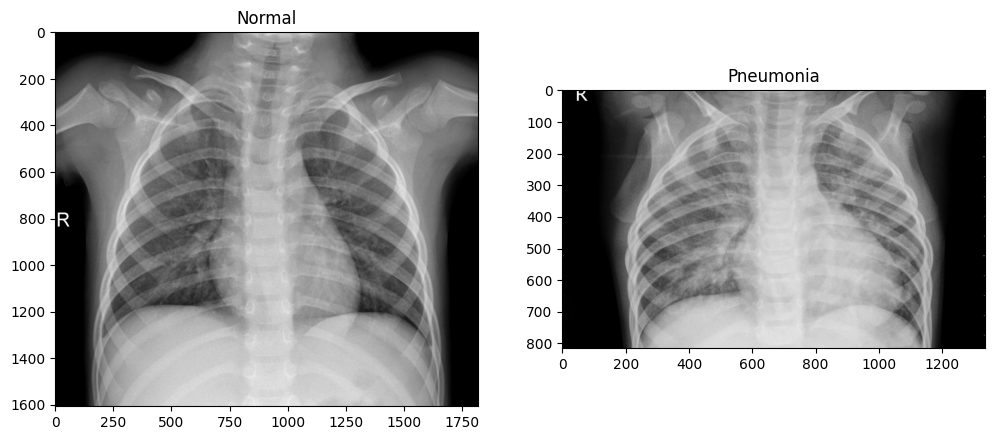

In [ ]:
# view a regular image file
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

file_normal = train_files_normal[0] # uses first normal filename from glob list
file_pneum = train_files_pneum[0] # uses first pneumonia filename from glob list

img_n = image.load_img(file_normal)
img_p = image.load_img(file_pneum)

# need subplot titles and each plot still
fig, ax = plt.subplots(figsize=(12,6),ncols=2)


ax[0].imshow(img_n)
ax[0].set(title='Normal')

ax[1].imshow(img_p)
ax[1].set(title='Pneumonia')
plt.show()

test chuyển đổi thành định dạng tensor

(1, 224, 224, 3)


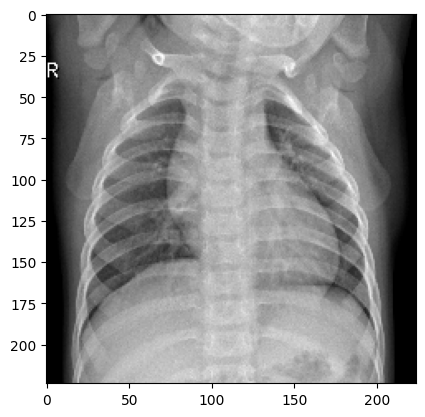

In [ ]:
feature_img = train_files_normal[1] # uses first normal filename from glob list

f_img = image.load_img(feature_img, target_size=(224,224))

# view as a tensor image
img_tensor = image.img_to_array(f_img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Follow the Original Model Preprocessing
img_tensor /= 255.

# Check tensor shape
print(img_tensor.shape)

# Preview an image
plt.imshow(img_tensor[0])
plt.show()

# **3. Modeling**

In [ ]:
np.random.seed(111)
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import datetime


# timer for model
original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224 ,224,  3)))
# Step 2 - Pooling
model.add(layers.MaxPooling2D((2, 2)))

# Adding a second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Pooling
model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Pooling
model.add(layers.MaxPooling2D((2, 2)))

# Step 3 - Flattening
model.add(layers.Flatten())

# Step 4 - Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))

model.add(layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'sgd',
                   loss = 'binary_crossentropy',
                   metrics = ['acc'])

# Call early stop
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

print()
display(model.summary())



# Fitting the CNN to the images using fit_generator
history = model.fit(training_set,
                             steps_per_epoch = len(training_set),
                             epochs = 10,
                             validation_data = test_set,
                             validation_steps =len(test_set),
                             callbacks=[early_stop],
                             verbose=1)

# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

None

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 632s 12s/step - acc: 0.7441 - loss: 0.5786 - val_acc: 0.6250 - val_loss: 0.6079
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 684s 12s/step - acc: 0.7314 - loss: 0.5321 - val_acc: 0.8317 - val_loss: 0.4910
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 628s 12s/step - acc: 0.7955 - loss: 0.4785 - val_acc: 0.7147 - val_loss: 0.5473
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 681s 13s/step - acc: 0.8171 - loss: 0.4204 - val_acc: 0.8397 - val_loss: 0.3975
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 621s 12s/step - acc: 0.8459 - loss: 0.3669 - val_acc: 0.6554 - val_loss: 0.7368
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 622s 12s/step - acc: 0.8705 - loss: 0.3139 - val_acc: 0.7468 - val_loss: 0.5218
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 622s 12s/step - acc: 0.8900 - loss: 0.2703 - val_acc: 0.8510 - val_loss: 0.3380
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 619s 12s/step - acc: 0.8861 - loss: 0.2757 - val_acc: 0.8301 - val_loss: 0.3951
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 621s 12s/step - ac

In [ ]:
# training loss and accuracy
results_train = model.evaluate(X_train, y_train)
results_train

163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 959ms/step - acc: 0.8324 - loss: 43.8076


[21.521892547607422, 0.9148772954940796]

In [ ]:
# test loss and accuracy
results_test = model.evaluate(X_test, y_test)
results_test

20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.6168 - loss: 129.7837  


[69.77568054199219, 0.7900640964508057]

In [ ]:
# Save model
model.save('/content/drive/MyDrive/SIC_LungXray_Classification/chest_xray_sgdmodel.h5')

trực quan hóa kết quả

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 933ms/step
              precision    recall  f1-score   support

           0       0.94      0.47      0.63       234
           1       0.76      0.98      0.85       390

    accuracy                           0.79       624
   macro avg       0.85      0.73      0.74       624
weighted avg       0.82      0.79      0.77       624



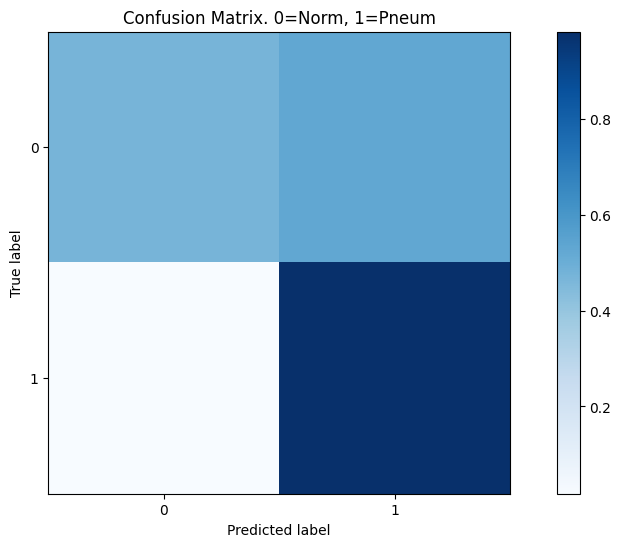

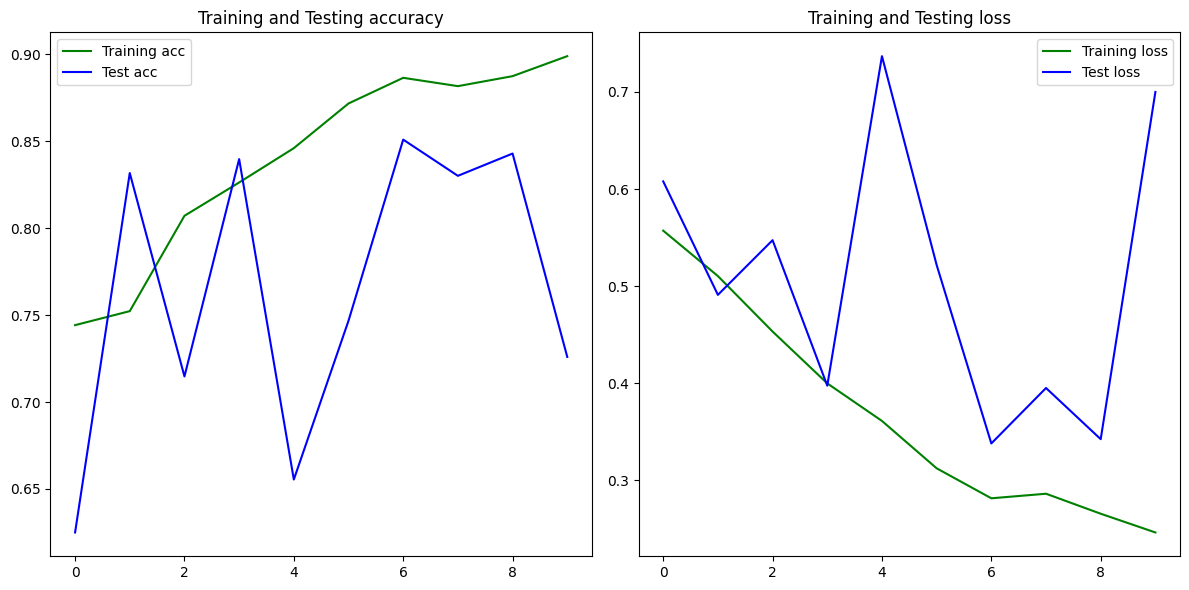

In [ ]:
y_preds_proba = model.predict(X_test)
y_preds = (y_preds_proba > 0.5).astype(int).flatten()
evaluate_model(y_test,y_preds,history)

## Model sử dụng ADAM và .Dropout

In [ ]:
np.random.seed(111)

from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import datetime


# timer for model
start = datetime.datetime.now()

# Initialising the CNN
adam_drop_model = Sequential()

# Step 1 - Convolution
adam_drop_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224 ,224,  3)))
# Step 2 - Pooling
adam_drop_model.add(layers.MaxPooling2D((2, 2)))

# Adding a second convolutional layer
adam_drop_model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(224 ,224,  3)))
# Pooling
adam_drop_model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer
adam_drop_model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(224 ,224,  3)))
# Pooling
adam_drop_model.add(layers.MaxPooling2D((2, 2)))

# Step 3 - Flattening
adam_drop_model.add(layers.Flatten())

# Step 4 - Full connection
adam_drop_model.add(layers.Dense(units = 128, activation = 'relu'))

# Dropout applied to the full connection layer
adam_drop_model.add(layers.Dropout(0.3))

# Step 5 - Full connection with dropout
adam_drop_model.add(layers.Dense(units = 512, activation = 'relu'))

# Dropout applied to the full connection layer
adam_drop_model.add(layers.Dropout(0.3))

# output
adam_drop_model.add(layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
adam_drop_model.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['acc'])
print()
display(adam_drop_model.summary())

# Call early stop
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

# Fitting the CNN to the images using fit_generator
adam_drop_history = adam_drop_model.fit(training_set,
                                     steps_per_epoch = len(training_set),
                                     epochs = 30,
                                     validation_data = test_set,
                                     validation_steps = len(test_set),
                                     callbacks=[early_stop],
                                     verbose=1)
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,235,521 (42.86 MB)

 Trainable params: 11,235,521 (42.86 MB)

 Non-trainable params: 0 (0.00 B)

None

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 651s 12s/step - acc: 0.7415 - loss: 0.6272 - val_acc: 0.7917 - val_loss: 0.5622
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 646s 12s/step - acc: 0.8933 - loss: 0.2620 - val_acc: 0.8301 - val_loss: 0.3447
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 674s 13s/step - acc: 0.9092 - loss: 0.2340 - val_acc: 0.8429 - val_loss: 0.4021
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 646s 12s/step - acc: 0.9219 - loss: 0.2085 - val_acc: 0.7949 - val_loss: 0.4980
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 679s 12s/step - acc: 0.9240 - loss: 0.1935 - val_acc: 0.8109 - val_loss: 0.5089
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 664s 13s/step - acc: 0.9380 - loss: 0.1734 - val_acc: 0.8253 - val_loss: 0.4249
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 657s 12s/step - acc: 0.9375 - loss: 0.1581 - val_acc: 0.8830 - val_loss: 0.3007
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 645s 12s/step - acc: 0.9350 - loss: 0.1659 - val_acc: 0.9135 - val_loss: 0.2542
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 684s 12s/step - ac

In [ ]:

results_train = adam_drop_model.evaluate(X_train, y_train)

163/163 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - acc: 0.9469 - loss: 8.3943


In [ ]:

results_test = adam_drop_model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 961ms/step - acc: 0.8273 - loss: 55.8374


In [ ]:
# training loss and accuracy
results_train

[13.243557929992676, 0.9212039709091187]

In [ ]:
# test loss and accuracy
results_test

[35.31902313232422, 0.8669871687889099]

In [ ]:
# Save model
adam_drop_model.save('/content/drive/MyDrive/SIC_LungXray_Classification/chest_xray_model.h5')

## Hiển thị kết quả

Trực quan hóa accuracy và loss

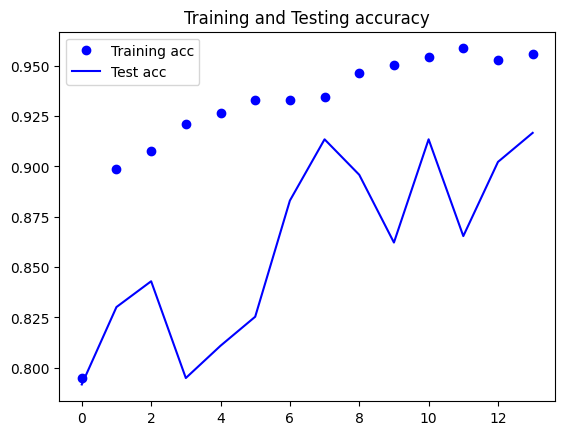

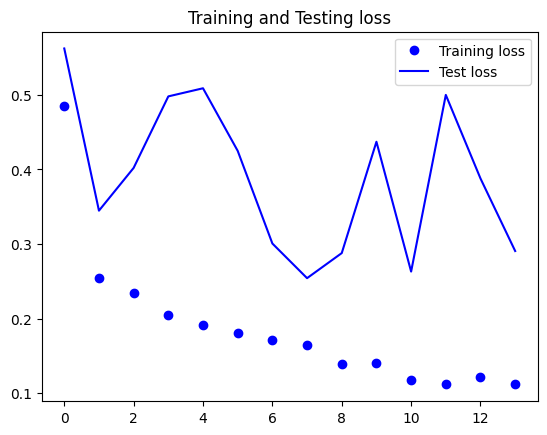

In [ ]:
# view baseline cnn results evaluate
import matplotlib.pyplot as plt
%matplotlib inline

train_acc = adam_drop_history.history['acc']
test_acc = adam_drop_history.history['val_acc']
train_loss = adam_drop_history.history['loss']
test_loss = adam_drop_history.history['val_loss']
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and Testing accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Testing loss')
plt.legend()
plt.show()

Trực quan hóa ma trận nhầm lẫn

20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       234
           1       0.88      0.92      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



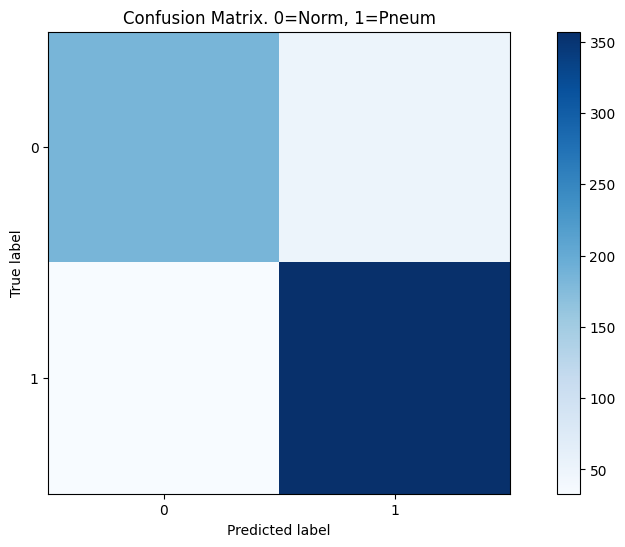

In [ ]:
import sklearn.metrics as metrics
# from mod3 project
def evaluate_model(y_test, y_pred,model_history=None):
    """Takes in your target, target predictions, model history.
        Returns a metric report and confusion matrix."""

    ## Classification Report / Scores
    print(metrics.classification_report(y_test,y_pred))

    # subplot for confusion matrix
    fig, ax = plt.subplots(figsize=(12,6))
    cm = metrics.confusion_matrix(y_test,y_pred)

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix. 0=Norm, 1=Pneum')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    classes = list(range(len(cm)))
    plt.xticks(classes, classes)
    plt.yticks(classes, classes)


    plt.show()

y_preds_proba = adam_drop_model.predict(X_test)
y_preds = (y_preds_proba > 0.5).astype(int).flatten()

evaluate_model(y_test,y_preds,adam_drop_history)